<a href="https://colab.research.google.com/github/ganathetechie/AlmaBetter-Capstone-Projects/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In this notebook, we are exploring the playstore apps data which has information about lots of android apps.
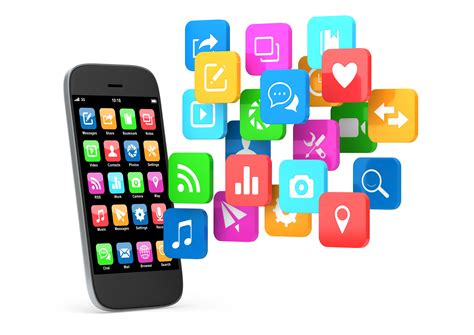 

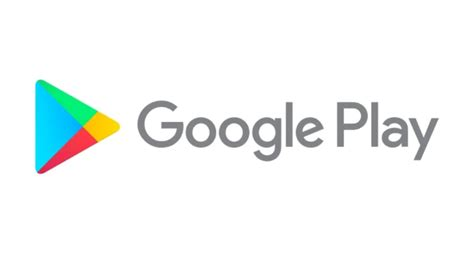



---



---


The data set has 13 parameters or columns with 10,000 + observations. 
Android app market is a billion dollar business and so is highly competetive in nature. This makes the developers to always build applications which drive more engagement and accepted by the large nuumber of audience.
So, it is essential for the app developers to know the statistics and draw insignts from the available data in order to understand the market and develop applications which drive more business.

Therefore, we should draw some key insights from the available dataset to answer some of the following questions:



1.   Which apps has highest number of installs among paid and free?
2.   Which category has the highest users in paid and free app markets?
3.   What is the average price of the apps in each category among paid apps?
4.   What are the top 10 apps in terms of revenue?
5.   Comparing user ratings between paid and free apps across the categories.
6.   Find the most popular apps in the market, Infer some reasons for popularity.
7.   Which is the top app category in terms of installs?
8.   Reason around the factors that influence the user ratings, engagement and satisfaction in the app market
9.   Find the correlation between:
        *   Content category - Genres
        *   








---






# **Exploring the Play Store Apps Dataset**

Before jumping into any analysis, let us do the typical part of any data science project, i.e. Importing the required libraries and loading the dataset into the environment, We use the most commonly used libraries like **pandas, numpy**  for crunching the data and **seaborn and matplotlib** for data visualisation.

In [1]:
# Importing the pandas,matplotlib and seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Mounting the google drive to the colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Let us read the data set into the colab environment**

In [3]:
# Loading the dataset

directory_path = '/content/drive/MyDrive/AlmaBetter/Capstone Projects/Capstone-Project-1/data'
apps_df = pd.read_csv(directory_path + '/Play Store Data.csv')

Now that we have loaded the dataset into our colab environment, let us perform basic exploration to understand the attributes and variables in each category better.

# **Fundamental analysis of the dataset**

In [4]:
# This gives the top 5 rows in the dataset.
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Let us now dive into the columns that we have in the dataset

In [5]:
apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Also, let us check the datatypes of each variable in the dataset

In [6]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


The command `apps_df.info()` gives the datatype of the values present in each column and the count of Non-Null observations in them. If you observe, 


> We have 8 columns (***App, Category, Reviews, Size, Installs, Price, Genres and Last Updated***) with 10841 Non-Null values which implies that no null values are present in these columns which is a sign for a good data.


> Also, we have 4 more columns (**Type, Content Rating, Current Ver and Android Ver**) with 10833+ observations. We can look and fill this information manually from the playstore.


> But only one parameter ***Ratings*** has 9367 observations **86% Non-Null** and the remaining  **14% as Null values**.

We shall explore the ways to handle these null values in different methods.








**Now, we shall see some descriptive statistics of the numerical variables in the dataset.**

In [7]:
# The describe function gives the summary statistics of the numerical columns in the dataset
apps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


**Observations from above operation:**
1. The max value of the Rating column is 19, which is not correct for values on a scale of 5. Therefore we should replace the 19 with a max of 5.

2. Although, the variables like reviews, price, installs which are technically numerical, they are present in object type which indicates that we should transform the data to a numerical format. (We will convert them in the data manipulation step)

# **Data Cleaning**

## 1.Removing the outliers

Well! What is an outlier?
In simple terms, an outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset you're working with.
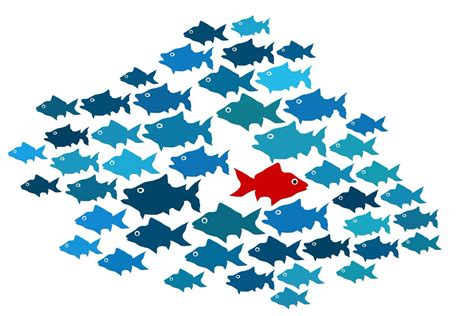

Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset or graph. [Know more](https://www.freecodecamp.org/news/what-is-an-outlier-definition-and-how-to-find-outliers-in-statistics/)


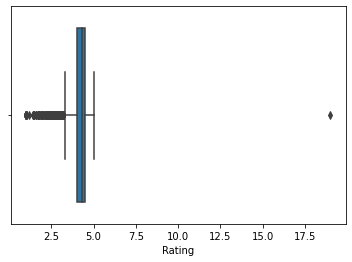

In [8]:
# Using the seaborn library to plot the rating measure
ax = sns.boxplot(x = 'Rating', data = apps_df)

We can clearly see that the rating value 19 is an **outlier** in the dataset. 
So, we will replace it with the max value that is possible i.e 5.

In [9]:
apps_df['Rating'] =  apps_df['Rating'].replace([19.0], 5.0) 
# We have replaced the outlier with a local maximum value

Let us again verify if the rating outlier is removed or not by looking at the summary statistics and boxplot again.

In [10]:
apps_df.describe()

,Rating
count,9367.000000
mean,4.191844
std,0.515259
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


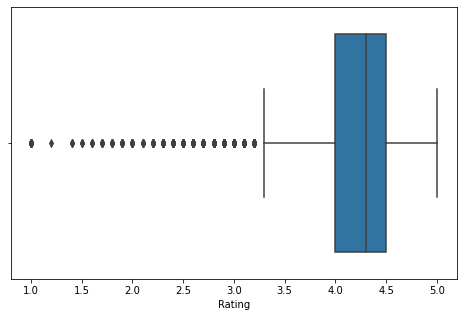

In [11]:
# Again plotting the Rating variable after replacing the outlier
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.boxplot(x = 'Rating', data = apps_df)

In [12]:
# Checking the maximum of the 
apps_df['Rating'].max()

5.0

In our Rating column, we have removed the outlier and now we have to fill the NaN values with some relevant values by using the measures of central tendency like mean, median or mode. 

## Removing the NaN values from the rating column

What is a NaN value?
NaN stands for Not a Number, it is a special floating point type which indicates the absense of a floating point integer value. One must note that NaN is not equal to 0 or Null. Refer [Difference between NaN and Null](https://medium.com/@allenhuang1996/whats-the-difference-between-null-and-nan-in-python-a1af20d523ce )


Basically, we can use either **mean imputation** or **median imputaion** to remove the Null values in the dataset.

Let us plot the histogram of the rating column and see which method suits well.

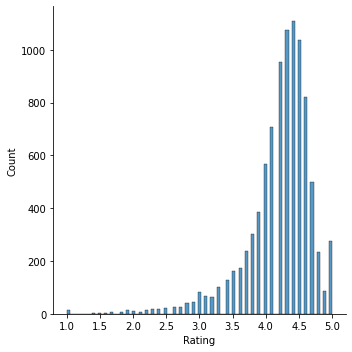

In [13]:
# Using the displot method to plot the histogram of the rating attribute
ax = sns.displot(x = 'Rating', data = apps_df)

With reference of the [Imputaton Methods](https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/) as the distribution is left skewed, we are following the median imputaion method and fill the NaN with the median values in the ratings column

In [14]:
# What is the median of the data?
apps_df['Rating'].median()

4.3

In [15]:
apps_df['Rating'] = apps_df['Rating'].fillna(apps_df['Rating'].median())

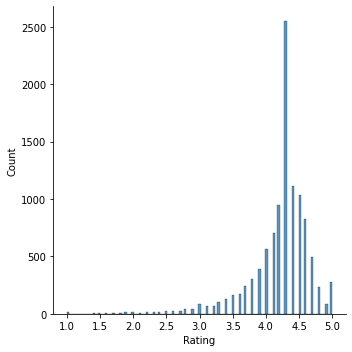

In [16]:
ax = sns.displot(apps_df.Rating)

In [17]:
apps_df['Rating'].mean()

4.206549211327507

We can see that even after the median imputation, the mean of the column is close to 4.2

## Removing NaN values in other columns

Needs to be updated ---------------------

### Filling NaN with Free in the type column

In [18]:
apps_df.loc[apps_df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


We can see that the price is 0 for the above app. Therefore, we can fill the type with **free** in the place of NaN

In [19]:
# Using the fillna method to fill the NaN with Free
apps_df['Type'] = apps_df['Type'].fillna('Free')

In [20]:
# Checking if there are any null values left in the column
apps_df['Type'].isna().any()

False

So, we have successfully removed the NaN value from the Type column

Now, also let us check the content rating variable for the NaN values

### Cleaning the Content Rating Column

In [21]:
apps_df.loc[apps_df['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,5.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The above observation has the values misplaced, let us remove the observation as it will not cause much affect in the overall analysis.

In [22]:
#Removing the row which is not collected properly
apps_df = apps_df.drop(apps_df.index[10472])

We have left with two more variables Current Ver and Android Ver to sort out and remove the NaN,

*   To fill the NaN values of the Current Ver we assume that they are still in the initial version with which they have released with i.e. 1.0.0. So, we will replace the NaNs with 1.0.0
*   There is two more observation in which the Android Ver is not present. We assume that it supports everything from android 1.0 and up








###  Removing NaNs from Current Ver Column







In [23]:
# Step 1
apps_df.loc[apps_df['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [24]:
# Step 2: Filling the NaN with 1.0.0 version as their current version
apps_df['Current Ver'] = apps_df['Current Ver'].fillna('1.0.0')

In [25]:
# Step 3: Checking the NaN values in the Android Ver column
apps_df.loc[apps_df['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


### Removing NaNs from *Android Ver* Column

In [26]:
# Let us now replace the two NaN values in the Android Ver to 1.0 and and up 
apps_df['Android Ver'] = apps_df['Android Ver'].fillna('1.0 and up')

By this step, we have completely cleaned the data and filled the NaN with appropriate values in all the columns in the dataset. Let us verify it with a `apps_df.info()`and save the file for further use.

In [27]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Therefore we have 10840 observations which are non-null. Now, we shall save this file as `Play_Store_Data_Clean.csv`

In [28]:
apps_df.to_csv('Play_Store_Data_Clean.csv')

# **Data Manipulation**

## Transforming the data types

If you observe the dataset, the attributes like price, installs, current ver and android ver are numerical variables completely or partially. We shall use certain transformation methods to convert the data into usable format.


As we have saved the cleaned dataset in the new file, let us now use it to load other DataFrame from now.

In [29]:
df = pd.read_csv('/content/Play_Store_Data_Clean.csv')

Check for the columns in the cleaned dataset

In [30]:
df.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

There is a new column with name Unnamed created with the values of indexes while creating a new csv file, let us just drop the column from the dataframe

In [31]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [32]:
#Check the datatypes of the columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


The columns installs and price are technically numerical variables where as they are present in the dataset as objects of string. 
Let us try to perform certain string operations and extract the numbers in these columns.

In [33]:
#Creating a deep copy of the dataframe
df_copy = df.copy()

In [34]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


### Converting the price column into numerical

We are removing the $ sign from the values in the price column.


In [35]:
 #Using str.replace() to remove $ from the value and store the result in a new column called Price_in_$
df_copy['Price_in_$'] = df_copy['Price'].str.replace('$','') 

In [36]:
# Check if the $ symbol is removed or not
df_copy['Price_in_$'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

We are now converting the string values to the float type by using astype method on the `Price_in_$` column

In [37]:
df_copy['Price_in_$'] = df_copy['Price_in_$'].astype(float)

In [38]:
# CHecking if the dtype of the column has changed or not.
df_copy['Price_in_$'].dtype

dtype('float64')

### Converting the Installs from string object to int



> Now, we have to deal with the installs count. In the dataset we have the installs count as 10+, 100+ 10,000+, 10,00,000 + and so on.. In this operation we only assume the base value as 10,100,10000 etc by removing the '+' sign and ',' from the values.





In [39]:

df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [40]:
#In this step we will remove the + sign from the Installs column
df_copy['Installs'] = df_copy['Installs'].str.replace('+','')

# Also, replace the ',' with a ''
df_copy['Installs'] = df_copy['Installs'].str.replace(',','')

In [41]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

Now that the + sign in the string object is removed, we shall convert it to a integer type

In [42]:
df_copy['Installs'] = df_copy['Installs'].astype(int)

The column `Installs` has been transformed into integer type 

Finally checking for the statistics of the newly modified columns

In [43]:
df_copy.describe()

,Rating,Reviews,Installs,Price_in_$
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [44]:
df_copy.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Price_in_$        float64
dtype: object

## Adding New Columns in the data frame


*   Creating a Rating Description column
*   Creating a Estimated Revenue column



In [45]:
rating_description = ["Poor", "Fair", "Average", "Good", "Excellent"]
for value in range(len(rating_description)):
    df_copy.loc[(df_copy['Rating'] > value)&(df_copy['Rating'] <= value+1) , "Rating_Description"] = rating_description[value]
    

In [46]:
df_copy['Rating_Description'].unique()

array(['Excellent', 'Good', 'Average', 'Fair', 'Poor'], dtype=object)

### Creating Revenue -----

In [47]:
# Creating a new revenue column
df_copy['Estimated_Base_Revenue_in_$'] = df_copy['Price_in_$']*df_copy['Installs']

In [48]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Price_in_$', 'Rating_Description',
       'Estimated_Base_Revenue_in_$'],
      dtype='object')

In [49]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price_in_$,Rating_Description,Estimated_Base_Revenue_in_$
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0,Excellent,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0,Good,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0,Excellent,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0,Excellent,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0,Excellent,0.0


In [50]:
df_copy.dtypes

App                             object
Category                        object
Rating                         float64
Reviews                          int64
Size                            object
Installs                         int64
Type                            object
Price                           object
Content Rating                  object
Genres                          object
Last Updated                    object
Current Ver                     object
Android Ver                     object
Price_in_$                     float64
Rating_Description              object
Estimated_Base_Revenue_in_$    float64
dtype: object

In [51]:
df_copy.to_csv('Play_Store_Data_Transformed.csv')

Before jumping into the actual analysis of the data, in the given dataset the categories are broadly two when it comes to price of the app. i.e paid and free. In some scenarios we need to analyse certain variables like revenue, price only for the paid apps. Hence we are splitting the dataframe into paid and free dataframes. 

In [52]:
df_apps = pd.read_csv('/content/Play_Store_Data_Transformed.csv')
df_apps.drop('Unnamed: 0', axis = 1, inplace = True)

In [53]:
# Creating seperate paid and free dataframes
df_apps_free = df_apps[df_apps['Type'] == 'Free']
df_apps_paid = df_apps[df_apps['Type'] == 'Paid']

# Univariate Analysis


In the Univariate analysis we precisely analyse how some of the variables are present in the dataset. 
We will analyse some of the key variables like ratings, Price_in_$, Estimated_base_revenue_in_dollars etc.. 

1.   Ratings
2.   Price
3.   Revenue
4.   Installs
5.   Reviews



1 . Let us see how the **Ratings** variable is changing  

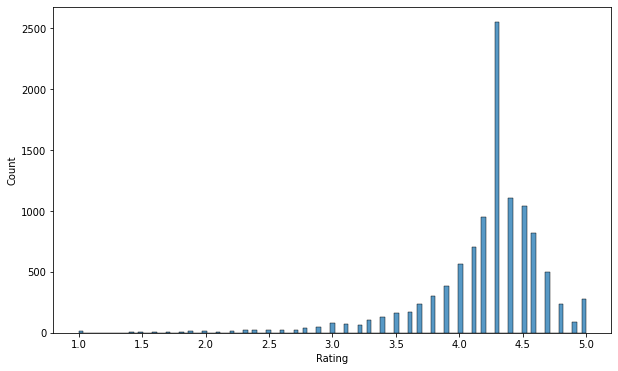

In [54]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.histplot(df_apps.Rating)


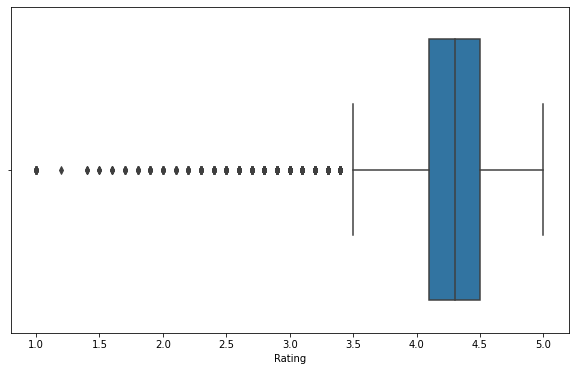

In [55]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.boxplot(x = df_apps.Rating)

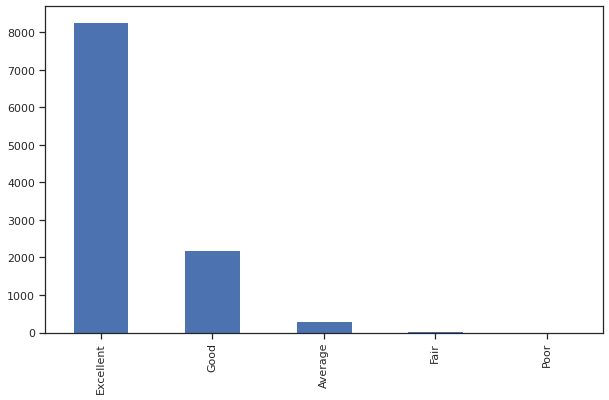

In [128]:
df_apps['Rating_Description'].value_counts().plot.bar(figsize = (10,6))

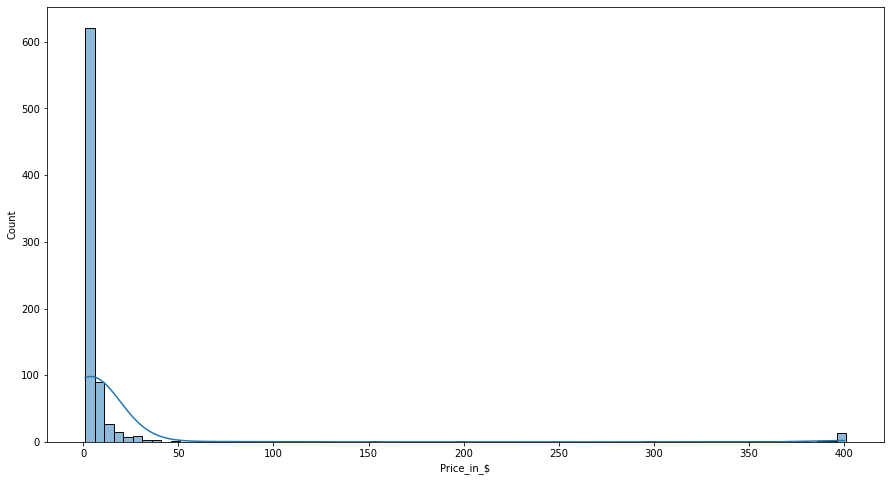

In [56]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.histplot(data = df_apps_paid, x = 'Price_in_$',  binwidth= 5, kde =True)


2. Univariate analysis on Reviews column

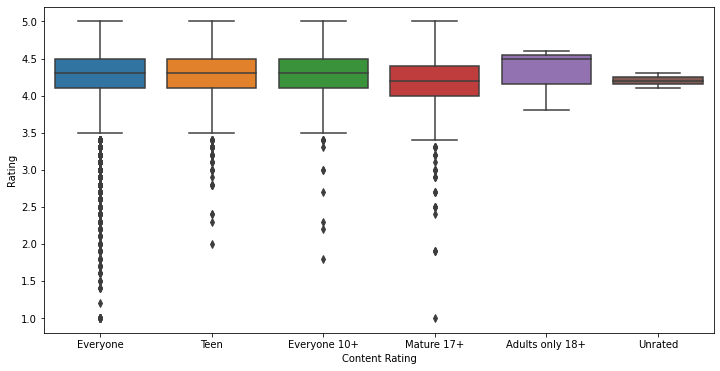

In [57]:
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.boxplot(x = df_apps['Content Rating'], y = df_apps['Rating'])

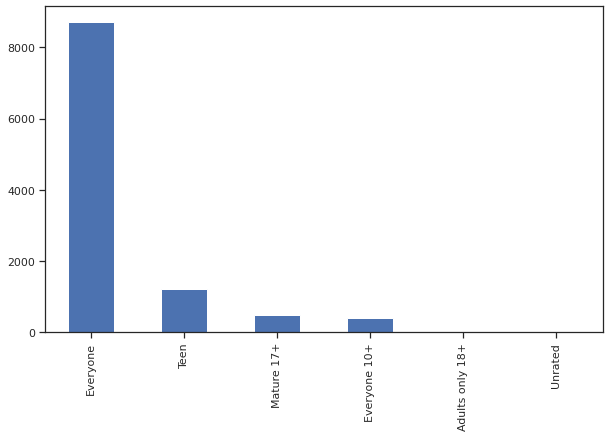

In [131]:
df_apps['Content Rating'].value_counts().plot.bar(figsize = (10,6))

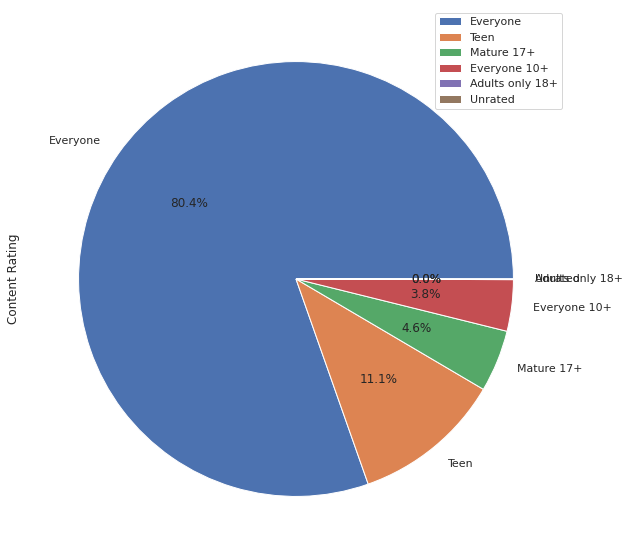

In [150]:
df_apps['Content Rating'].value_counts().plot.pie(figsize = (10,10), autopct='%1.1f%%')
plt.legend()

###Rating Vs Category analysis

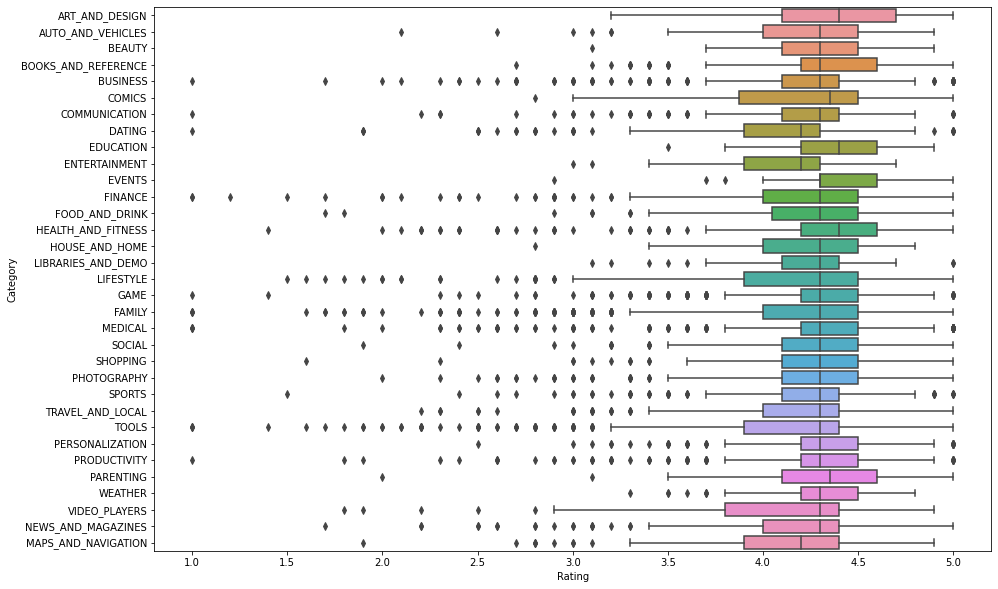

In [78]:
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.boxplot(x = df_apps['Rating'], y = df_apps['Category'])

rating_vs_category in all the apps

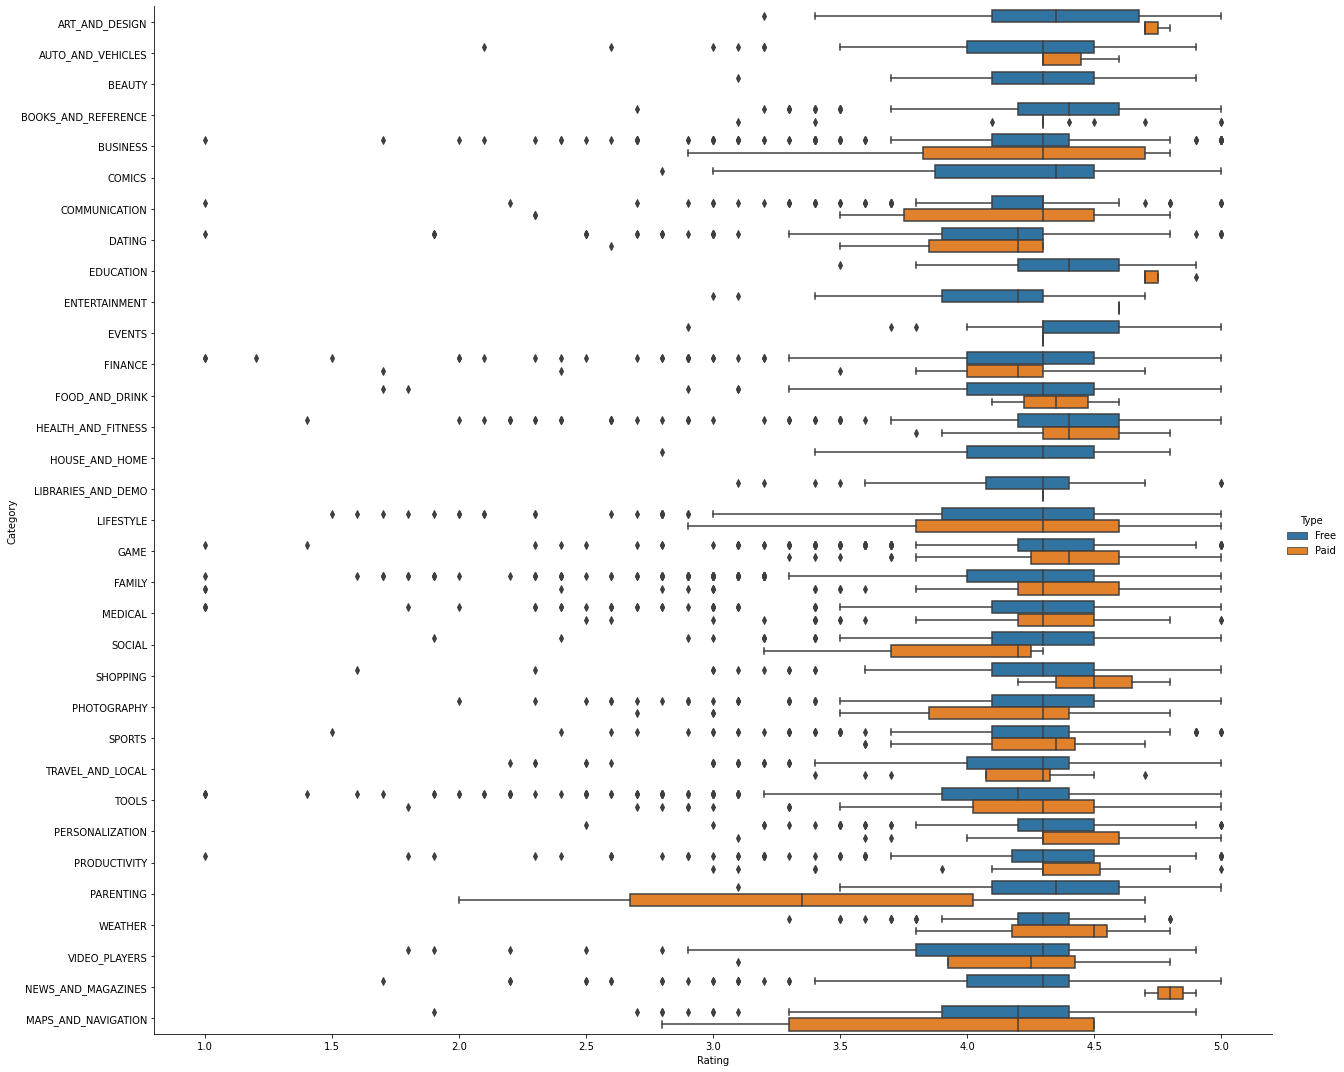

In [59]:
ax = sns.catplot(y="Category", x="Rating", hue="Type", kind="box", data=df_apps, height=15, aspect=1.2)

### 1. Which apps has the highest installs among paid and free?

In [80]:
# Free Apps That Crossed 1B+ Downloads
top_free_apps_by_count = df_apps_free.loc[df_apps_free['Installs'] == df_apps_free['Installs'].max()] 
top_free_apps_by_count[['App','Category','Installs']]

,App,Category,Installs
152,Google Play Books,BOOKS_AND_REFERENCE,1000000000
335,Messenger – Text and Video Chat for Free,COMMUNICATION,1000000000
336,WhatsApp Messenger,COMMUNICATION,1000000000
338,Google Chrome: Fast & Secure,COMMUNICATION,1000000000
340,Gmail,COMMUNICATION,1000000000
341,Hangouts,COMMUNICATION,1000000000
381,WhatsApp Messenger,COMMUNICATION,1000000000
382,Messenger – Text and Video Chat for Free,COMMUNICATION,1000000000
386,Hangouts,COMMUNICATION,1000000000
391,Skype - free IM & video calls,COMMUNICATION,1000000000


In [61]:
print("The total number of free apps that crossed 1 billion + downloads is {}".format(len(top_free_apps_by_count)))

The total number of free apps that crossed 1 billion + downloads is 58


In [81]:
# Top Paid apps by count which crossed 10M+ downloads
top_paid_apps_by_count = df_apps_paid.loc[df_apps_paid['Installs'] == df_apps_paid['Installs'].max()]
top_paid_apps_by_count[['App','Category','Installs']]

,App,Category,Installs
2241,Minecraft,FAMILY,10000000
4034,Hitman Sniper,GAME,10000000
4347,Minecraft,FAMILY,10000000


In [63]:
print("The total number of paid apps that crossed 10 Million + downloads is {}".format(len(top_paid_apps_by_count)))

The total number of paid apps that crossed 10 Million + downloads is 3


On this analysis, we find that the number of downloads of free apps is more than 100 times greater than the paid app downloads.

    There are 58 free apps that have 1 Billion + downloads whereas only 3 apps which are more than 10 Million + downloads in the paid app category

### 2. Which category has the highest users in paid and free app markets?

In [64]:
sorted_df_free = df_apps_free.groupby(['Category']).sum()[['Installs']]
highest_users_in_free = sorted_df_free[sorted_df_free['Installs'] == sorted_df_free['Installs'].max()].rename(columns = {'Installs':'Highest Installed Category among Free apps'})
highest_users_in_free

,Highest Installed Category among Free apps
Category,
GAME,35064924450


In [65]:
sorted_df_paid = df_apps_paid.groupby(['Category']).sum()[['Installs']]
highest_users_in_paid = sorted_df_paid[sorted_df_paid['Installs'] == sorted_df_paid['Installs'].max()].rename(columns = {'Installs':'Highest Installed Category among Paid apps'})
highest_users_in_paid

,Highest Installed Category among Paid apps
Category,
FAMILY,31271814


###  3. What is the average price of the apps in each category among paid apps?

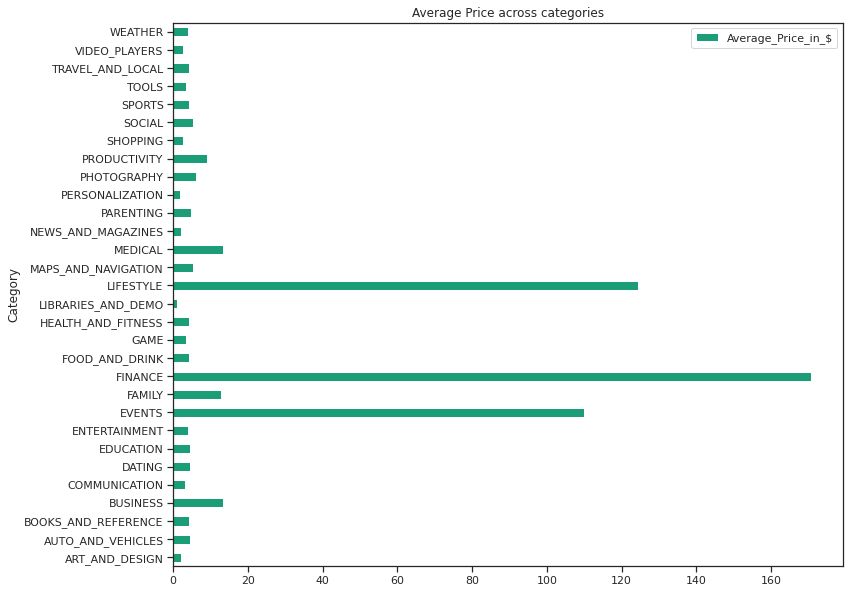

In [164]:
average_price_across_categories = df_apps_paid.groupby(['Category']).mean()[['Price_in_$']].rename(columns = {'Price_in_$':'Average_Price_in_$'})
average_price_across_categories.plot(kind = 'barh', title = 'Average Price across categories', figsize = (12,10), cmap='Dark2')

### 4 .What are the top 10 apps in terms of revenue?

In [68]:
top_10_revenue_apps = df_apps_paid.nlargest(10,['Estimated_Base_Revenue_in_$'])
top_10_revenue_apps[['App','Category','Installs','Price_in_$','Estimated_Base_Revenue_in_$']]

,App,Category,Installs,Price_in_$,Estimated_Base_Revenue_in_$
2241,Minecraft,FAMILY,10000000,6.99,69900000.0
4347,Minecraft,FAMILY,10000000,6.99,69900000.0
5351,I am rich,LIFESTYLE,100000,399.99,39999000.0
5356,I Am Rich Premium,FINANCE,50000,399.99,19999500.0
4034,Hitman Sniper,GAME,10000000,0.99,9900000.0
7417,Grand Theft Auto: San Andreas,GAME,1000000,6.99,6990000.0
2883,Facetune - For Free,PHOTOGRAPHY,1000000,5.99,5990000.0
2912,Facetune - For Free,PHOTOGRAPHY,1000000,5.99,5990000.0
2950,Facetune - For Free,PHOTOGRAPHY,1000000,5.99,5990000.0
5578,Sleep as Android Unlock,LIFESTYLE,1000000,5.99,5990000.0


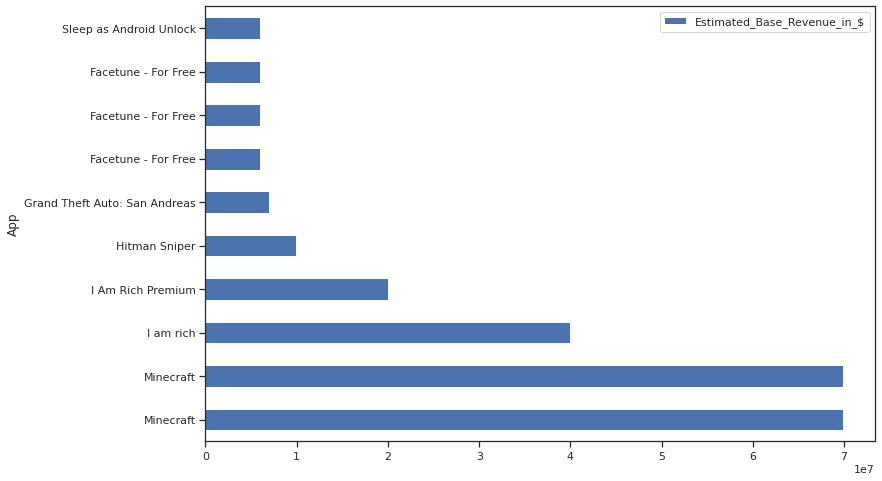

In [193]:
ax = top_10_revenue_apps.plot.barh( x = 'App', y = 'Estimated_Base_Revenue_in_$', figsize = (12,8))

### 5. Compare the user ratings between paid and free apps across the categories.

In [196]:
user_ratings_free = df_apps_free.groupby(['Category']).agg({'Rating': ['mean','max','min']}).reset_index()
user_ratings_paid = df_apps_paid.groupby(['Category']).agg({'Rating': ['mean','max','min']}).reset_index()

In [201]:
from IPython.display import display_html

df1 = user_ratings_free
df2 = user_ratings_paid

df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Ratings across categories for Free apps")
df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Ratings across categories for Free apps")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw= True)

Ratings across categories for Free apps Category Rating mean max min 
 
 0 
 ART_AND_DESIGN 
 4.337097 
 5.000000 
 3.200000 
 
 
 1 
 AUTO_AND_VEHICLES 
 4.198780 
 4.900000 
 2.100000 
 
 
 2 
 BEAUTY 
 4.283019 
 4.900000 
 3.100000 
 
 
 3 
 BOOKS_AND_REFERENCE 
 4.341379 
 5.000000 
 2.700000 
 
 
 4 
 BUSINESS 
 4.181166 
 5.000000 
 1.000000 
 
 
 5 
 COMICS 
 4.160000 
 5.000000 
 2.800000 
 
 
 6 
 COMMUNICATION 
 4.185556 
 5.000000 
 1.000000 
 
 
 7 
 DATING 
 4.029075 
 5.000000 
 1.000000 
 
 
 8 
 EDUCATION 
 4.378947 
 4.900000 
 3.500000 
 
 
 9 
 ENTERTAINMENT 
 4.119728 
 4.700000 
 3.000000 
 
 
 10 
 EVENTS 
 4.396825 
 5.000000 
 2.900000 
 
 
 11 
 FAMILY 
 4.194778 
 5.000000 
 1.000000 
 
 
 12 
 FINANCE 
 4.161891 
 5.000000 
 1.000000 
 
 
 13 
 FOOD_AND_DRINK 
 4.183200 
 5.000000 
 1.700000 
 
 
 14 
 GAME 
 4.280584 
 5.000000 
 1.000000 
 
 
 15 
 HEALTH_AND_FITNESS 
 4.275692 
 5.000000 
 1.400000 
 
 
 16 
 HOUSE_AND_HOME 
 4.211364 
 4.800000 
 2.800000 
 
 
 17 
 LIBRARIES_AND_DEMO 
 4.205952 
 5.000000 
 3.100000 
 
 
 18 
 LIFESTYLE 
 4.125069 
 5.000000 
 1.500000 
 
 
 19 
 MAPS_AND_NAVIGATION 
 4.083333 
 4.900000 
 1.900000 
 
 
 20 
 MEDICAL 
 4.200565 
 5.000000 
 1.000000 
 
 
 21 
 NEWS_AND_MAGAZINES 
 4.157295 
 5.000000 
 1.700000 
 
 
 22 
 PARENTING 
 4.332759 
 5.000000 
 3.100000 
 
 
 23 
 PERSONALIZATION 
 4.305825 
 5.000000 
 2.500000 
 
 
 24 
 PHOTOGRAPHY 
 4.205431 
 5.000000 
 2.000000 
 
 
 25 
 PRODUCTIVITY 
 4.225758 
 5.000000 
 1.000000 
 
 
 26 
 SHOPPING 
 4.261240 
 5.000000 
 1.600000 
 
 
 27 
 SOCIAL 
 4.264726 
 5.000000 
 1.900000 
 
 
 28 
 SPORTS 
 4.235000 
 5.000000 
 1.500000 
 
 
 29 
 TOOLS 
 4.068366 
 5.000000 
 1.000000 
 
 
 30 
 TRAVEL_AND_LOCAL 
 4.131301 
 5.000000 
 2.200000 
 
 
 31 
 VIDEO_PLAYERS 
 4.083626 
 4.900000 
 1.800000 
 
 
 32 
 WEATHER 
 4.236486 
 4.800000 
 3.300000 
 
 Ratings across categories for Free apps Category Rating mean max min 
 
 0 
 ART_AND_DESIGN 
 4.733333 
 4.800000 
 4.700000 
 
 
 1 
 AUTO_AND_VEHICLES 
 4.400000 
 4.600000 
 4.300000 
 
 
 2 
 BOOKS_AND_REFERENCE 
 4.292857 
 5.000000 
 3.100000 
 
 
 3 
 BUSINESS 
 4.221429 
 4.800000 
 2.900000 
 
 
 4 
 COMMUNICATION 
 4.107407 
 4.800000 
 2.300000 
 
 
 5 
 DATING 
 3.914286 
 4.300000 
 2.600000 
 
 
 6 
 EDUCATION 
 4.750000 
 4.900000 
 4.700000 
 
 
 7 
 ENTERTAINMENT 
 4.600000 
 4.600000 
 4.600000 
 
 
 8 
 EVENTS 
 4.300000 
 4.300000 
 4.300000 
 
 
 9 
 FAMILY 
 4.295812 
 5.000000 
 1.000000 
 
 
 10 
 FINANCE 
 3.941176 
 4.700000 
 1.700000 
 
 
 11 
 FOOD_AND_DRINK 
 4.350000 
 4.600000 
 4.100000 
 
 
 12 
 GAME 
 4.367470 
 5.000000 
 3.300000 
 
 
 13 
 HEALTH_AND_FITNESS 
 4.368750 
 4.800000 
 3.800000 
 
 
 14 
 LIBRARIES_AND_DEMO 
 4.300000 
 4.300000 
 4.300000 
 
 
 15 
 LIFESTYLE 
 4.252632 
 5.000000 
 2.900000 
 
 
 16 
 MAPS_AND_NAVIGATION 
 3.860000 
 4.500000 
 2.800000 
 
 
 17 
 MEDICAL 
 4.266972 
 5.000000 
 2.500000 
 
 
 18 
 NEWS_AND_MAGAZINES 
 4.800000 
 4.900000 
 4.700000 
 
 
 19 
 PARENTING 
 3.350000 
 4.700000 
 2.000000 
 
 
 20 
 PERSONALIZATION 
 4.414458 
 5.000000 
 3.100000 
 
 
 21 
 PHOTOGRAPHY 
 4.090909 
 4.800000 
 2.700000 
 
 
 22 
 PRODUCTIVITY 
 4.239286 
 5.000000 
 3.000000 
 
 
 23 
 SHOPPING 
 4.500000 
 4.800000 
 4.200000 
 
 
 24 
 SOCIAL 
 3.900000 
 4.300000 
 3.200000 
 
 
 25 
 SPORTS 
 4.258333 
 4.700000 
 3.600000 
 
 
 26 
 TOOLS 
 4.194872 
 5.000000 
 1.800000 
 
 
 27 
 TRAVEL_AND_LOCAL 
 4.166667 
 4.700000 
 3.400000 
 
 
 28 
 VIDEO_PLAYERS 
 4.100000 
 4.800000 
 3.100000 
 
 
 29 
 WEATHER 
 4.362500 
 4.800000 
 3.800000

### 6. Find the most popular apps in the market, Infer some reasons for popularity.

In [71]:
# Assuming the popularity based on the number of reviews users have given to the app across both the categories of paid and free
popular_apps = df_apps.nlargest(10,['Reviews'])
popular_apps[['App','Category','Rating','Reviews']]

,App,Category,Rating,Reviews
2544,Facebook,SOCIAL,4.1,78158306
3943,Facebook,SOCIAL,4.1,78128208
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672
2604,Instagram,SOCIAL,4.5,66577446
2545,Instagram,SOCIAL,4.5,66577313
2611,Instagram,SOCIAL,4.5,66577313
3909,Instagram,SOCIAL,4.5,66509917
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578


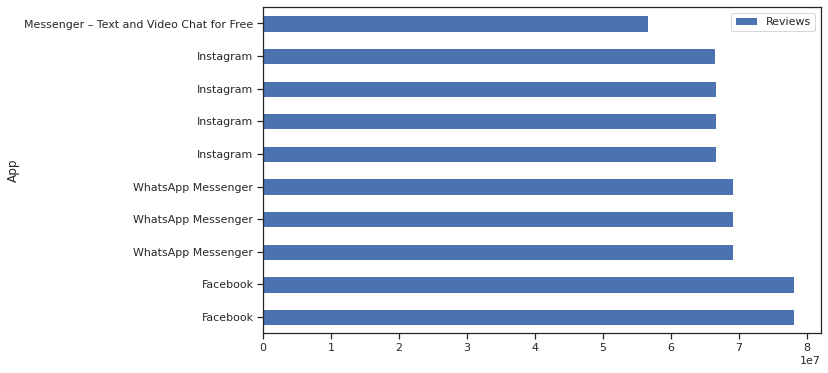

In [161]:
popular_apps[['App','Reviews']].plot.barh( x = 'App', y = 'Reviews', figsize = (10,6))
